Build your own cnn model

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_path = r'C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\horse-or-human\horse-or-human'

In [3]:
data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_data = data_gen.flow_from_directory(
    dataset_path, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
val_data = data_gen.flow_from_directory(
    dataset_path, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


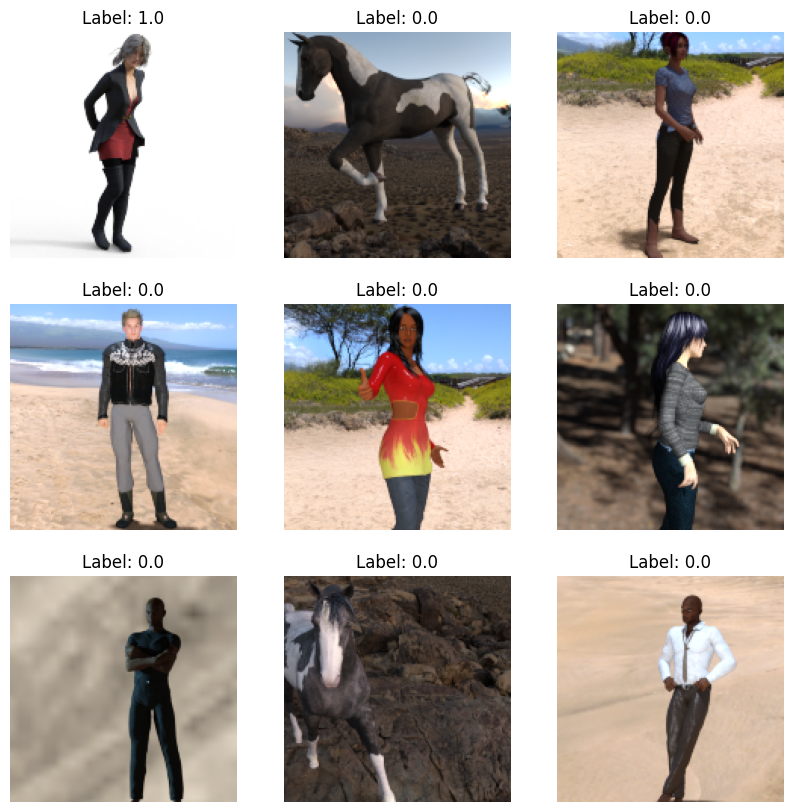

In [4]:
def plot_sample_images(data, labels):
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        img, label = next(data)
        plt.imshow(img[0])
        plt.title(f'Label: {label[0]}')
        plt.axis('off')
    plt.show()

plot_sample_images(train_data, train_data.classes)

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

c:\Users\Dilfina\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10


c:\Users\Dilfina\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 846ms/step - accuracy: 0.7235 - loss: 0.6380 - val_accuracy: 0.9453 - val_loss: 0.1688
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 388ms/step - accuracy: 0.9748 - loss: 0.0734 - val_accuracy: 0.9766 - val_loss: 0.0829
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 406ms/step - accuracy: 0.9881 - loss: 0.0393 - val_accuracy: 0.9727 - val_loss: 0.1389
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 449ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9844 - val_loss: 0.0912
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 407ms/step - accuracy: 0.9819 - loss: 0.0494 - val_accuracy: 0.8555 - val_loss: 0.4822
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 450ms/step - accuracy: 0.9594 - loss: 0.1064 - val_accuracy: 0.9648 - val_loss: 0.2571
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 417ms/step - accuracy: 0.9960 - loss: 0.0113 - val_accuracy: 0.9336 - val_loss: 0.3038
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 379ms/step - accuracy: 0.9904 - loss: 0.0383 - val_accuracy: 0.972

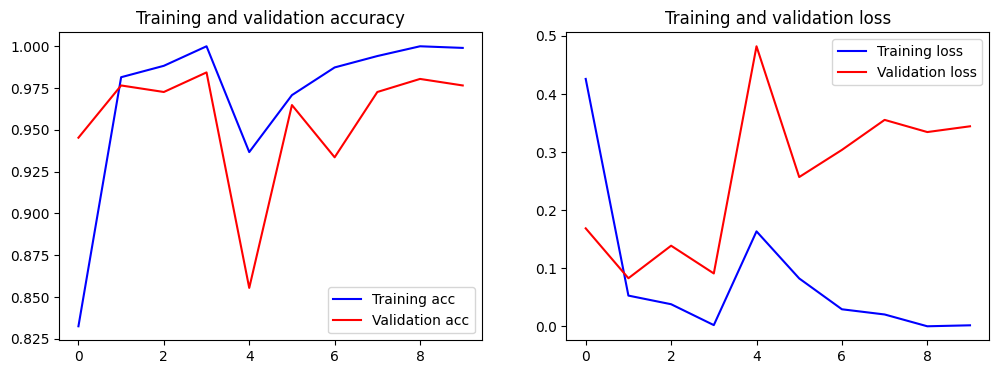

In [7]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

plot_history(history)

In [8]:
test_data = data_gen.flow_from_directory(
    dataset_path, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)
loss, accuracy = model.evaluate(test_data)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Found 256 images belonging to 2 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.9761 - loss: 0.3675
Test Loss: 0.3444640338420868, Test Accuracy: 0.9765625


In [9]:
y_pred = model.predict(test_data)
y_pred_classes = (y_pred > 0.5).astype("int32")
y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

print("Classification Report:\n", classification_report(y_true, y_pred_classes))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step
Confusion Matrix:
 [[170  35]
 [ 41  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       205
           1       0.22      0.20      0.21        51

    accuracy                           0.70       256
   macro avg       0.51      0.51      0.51       256
weighted avg       0.69      0.70      0.70       256

